In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trials_df = pd.read_csv(clinical_trial_data_to_load)


# Combine the data into a single dataset
combined_df = pd.merge(mouse_df, clinical_trials_df, how = 'left', on = 'Mouse ID')

# Display the data table for preview
combined_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_df = combined_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)']
avg_tumor_df = grouped_df.mean()


# Convert to DataFrame
tumor_response_df = avg_tumor_df.reset_index()

# Preview DataFrame
tumor_response_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
error_tumor_volume = grouped_df.sem()

# Convert to DataFrame
error_tumor_volume_df = pd.DataFrame(error_tumor_volume)

# Preview DataFrame
error_tumor_volume_df.reset_index(inplace=True)
error_tumor_volume_df



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [4]:
# Minor Data Munging to Re-Format the Data Frames
pivot_size_tumor = tumor_response_df.pivot(index = "Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")

# Preview that Reformatting worked
pivot_size_tumor.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


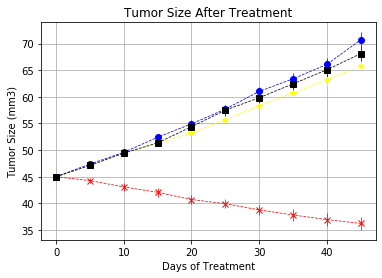

In [20]:
# Generate the Plot (with Error Bars)
drug_list_and_format = [("Capomulin", "x", "red"), ("Infubinol", "*", "yellow"), ("Ketapril", "o", "blue"), ("Placebo", "s", "black")]
for drug,marker,color in drug_list_and_format:
    standard_error_line = error_tumor_volume[drug]
    x_axis = pivot_size_tumor.index
    y_axis = pivot_size_tumor[drug]
    tumor_treament_plot = plt.errorbar(x_axis, y_axis, standard_error_line, fmt = marker, ls = "dashed", color = color, linewidth = .75)
# plt.legend(loc="best")
plt.title("Tumor Size After Treatment")
plt.xlabel("Days of Treatment")
plt.ylabel("Tumor Size (mm3)")
plt.grid()



# Save the Figure
plt.savefig("tumor_treatment_plot.png")

In [6]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_size_df = combined_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites']
met_size_avg_df = met_size_df.mean()

# Convert to DataFrame
met_size_df_2 = met_size_avg_df.reset_index()

# Preview DataFrame
met_size_df_2.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_standard_errors = met_size_df.sem()
# Convert to DataFrame
met_standard_errors_df = pd.DataFrame(met_standard_errors)


# Preview DataFrame
met_standard_errors_df.reset_index(inplace = True)
met_standard_errors_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [9]:
# Minor Data Munging to Re-Format the Data Frames
pivot_met_size_df = met_size_df_2.pivot(index = "Timepoint", columns = "Drug", values = "Metastatic Sites")

# Preview that Reformatting worked
pivot_met_size_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


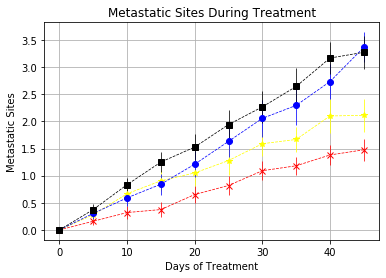

In [21]:
# Generate the Plot (with Error Bars)

for drug,marker,color in drug_list_and_format:
    standard_error_line = met_standard_errors[drug]
    x_axis = pivot_met_size_df.index
    y_axis = pivot_met_size_df[drug]
    met_size_plot = plt.errorbar(x_axis, y_axis, standard_error_line, fmt = marker, ls = "dashed", color = color, linewidth = .75)
# plt.legend(loc="best")
plt.title("Metastatic Sites During Treatment")
plt.xlabel("Days of Treatment")
plt.ylabel("Metastatic Sites")
plt.grid()



# Save the Figure

# Show the Figure
plt.savefig("met_size_plot.png")

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_ID_df= combined_df.groupby(["Drug", "Timepoint"])["Mouse ID"]
mouse_count_df = mouse_ID_df.nunique()
mouse_count_df = pd.DataFrame(mouse_count_df)
mouse_count_df

# Convert to DataFrame
mouse_count_df.reset_index(inplace = True)
mouse_count_df.head()

# Preview DataFrame


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
# Minor Data Munging to Re-Format the Data Frames
pivoted_mouse_count_df = mouse_count_df.pivot(index = "Timepoint", columns = "Drug", values = "Mouse ID")
pivoted_mouse_count_df

# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


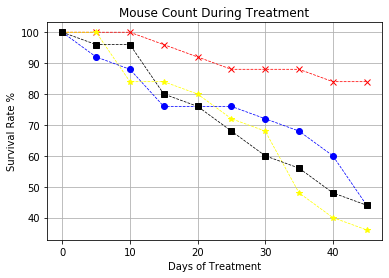

In [22]:
# Generate the Plot (Accounting for percentages)

for drug,marker,color in drug_list_and_format:
    total_mouse_count = pivoted_mouse_count_df[drug][0]
    survival_rate = (pivoted_mouse_count_df[drug]/total_mouse_count)*100
    x_axis = pivoted_mouse_count_df.index
    y_axis = pivoted_mouse_count_df[drug]
    mouse_count_plot = plt.errorbar(x_axis, survival_rate, fmt = marker, ls = "dashed", color = color, linewidth = .75)
# plt.legend(loc="best")
plt.title("Mouse Count During Treatment")
plt.xlabel("Days of Treatment")
plt.ylabel("Survival Rate %")
plt.grid()



# Save the Figure

# Show the Figure
plt.savefig("mouse_count_plot.png")

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug
percent_tumor_change = ((pivot_size_tumor.iloc[-1])/(pivot_size_tumor.iloc[0]))*100
actual_percent_tumor_change = percent_tumor_change-100
# Display the data to confirm
actual_percent_tumor_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

Text(0.5, 1.0, 'Tumor Change Over Treatment')

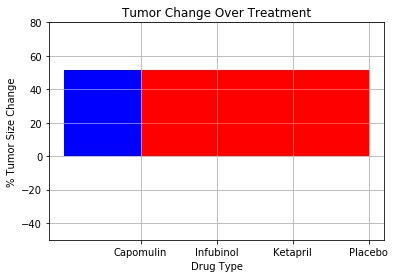

In [17]:
# Store all Relevant Percent Changes into a Tuple
passed = actual_percent_tumor_change <0

just_drug_list = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
for types in just_drug_list:
    answer = [(actual_percent_tumor_change[types])]
    
    

# change_list

percent_change_plot = plt.bar(just_drug_list, answer, width = -1, align = 'edge', color = passed.map({True:"blue", False:"red"}))
plt.grid()
plt.ylim(-50,80)
plt.ylabel("% Tumor Size Change")
plt.xlabel("Drug Type")
plt.title("Tumor Change Over Treatment")





# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figur
#plt.savefig("summary_chart.png")

![Metastatic Spread During Treatment](../Images/change.png)